In [1]:
import pandas as pd

resenha = pd.read_csv('dados/imdb-reviews-pt-br.csv')
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [2]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [3]:
classificacao = resenha['sentiment'].replace(['neg', 'pos'],[0, 1])

In [4]:
resenha['classificacao'] = classificacao

In [5]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [6]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def classificar_texto(texto, coluna_texto, coluna_classificacao):
    
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                                  texto[coluna_classificacao], 
                                                                  random_state=42)
    
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica.score(teste, classe_teste)
    

In [8]:
print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


In [9]:
%matplotlib inline

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query('sentiment =="neg"')
    
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [10]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query('sentiment =="pos"')
    
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

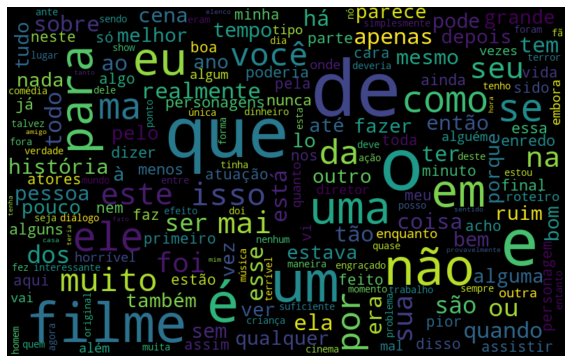

In [11]:
nuvem_palavras_neg(resenha, 'text_pt')

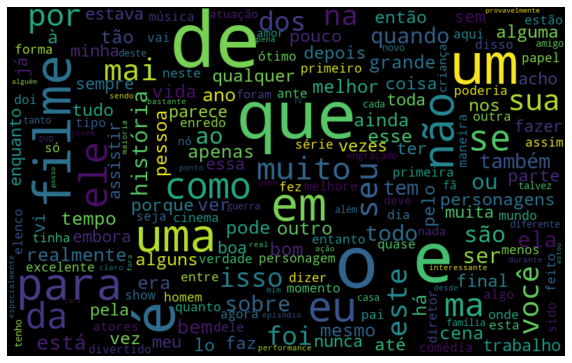

In [12]:
nuvem_palavras_pos(resenha, 'text_pt')

In [13]:
import nltk
token_espaco = nltk.tokenize.WhitespaceTokenizer()
token_pontuacao = nltk.tokenize.WordPunctTokenizer()

In [14]:
import seaborn as sns


def pareto(texto, coluna_texto, quantidade):
    
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])

    token_frase = token_espaco.tokenize(todas_palavras)

    frequencia = nltk.FreqDist(token_frase)
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequencia": list(frequencia.values())})


    df_frequencia = df_frequencia.nlargest(columns="Frequencia", n=quantidade)

    plt.figure(figsize=(12, 8))
    ax = sns.barplot(data=df_frequencia, x= 'Palavra', y='Frequencia')
    ax.set(ylabel='Contagem')
    plt.show()

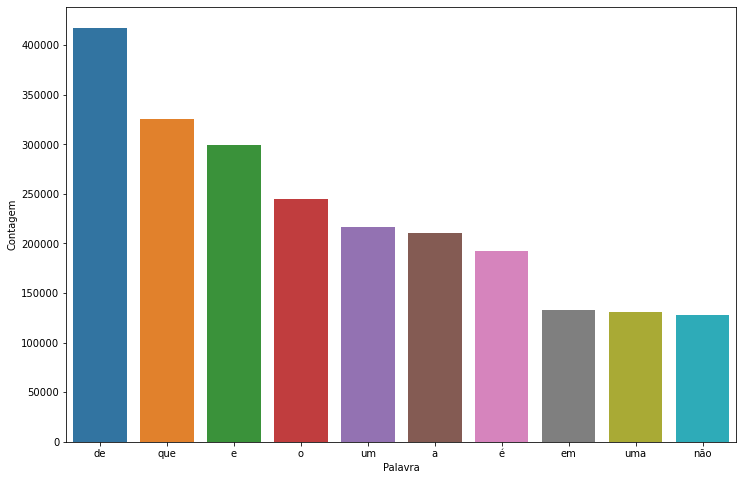

In [15]:
pareto(resenha, 'text_pt', 10)

In [16]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

frase_processada = list()

for opiniao in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))

        
resenha['tratamento_1'] = frase_processada

In [17]:
classificar_texto(resenha, 'tratamento_1', 'classificacao')

0.6607359482410028

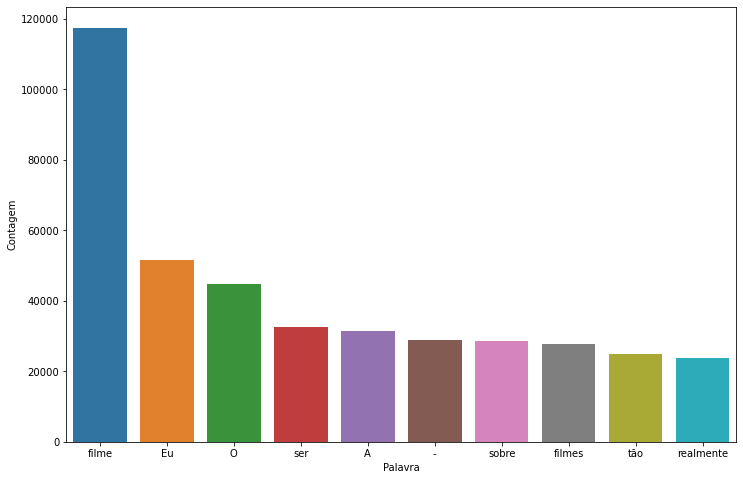

In [18]:
pareto(resenha, 'tratamento_1', 10)

In [19]:
from string import punctuation

pontuacao = list()

for ponto in punctuation:
    pontuacao.append(ponto)
    
pontuacao_stopwords = pontuacao + palavras_irrelevantes

In [20]:
frase_processada = list()
for opiniao in resenha['tratamento_1']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_2'] = frase_processada

In [21]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


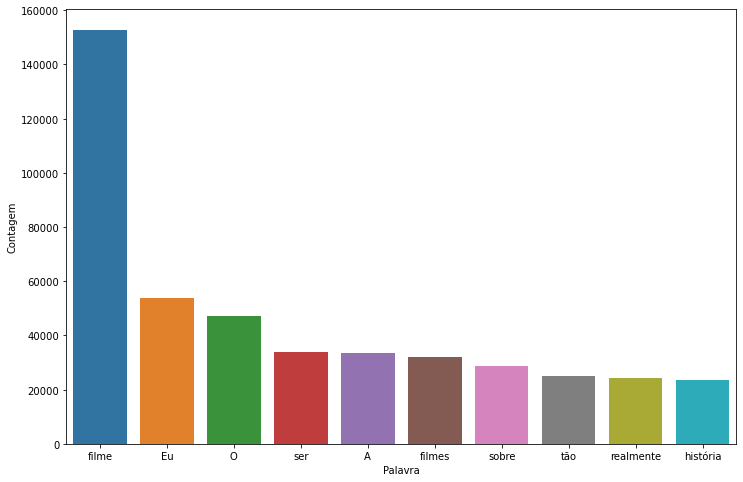

In [22]:
pareto(resenha, 'tratamento_2', 10)

In [23]:
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in resenha['tratamento_2']]

In [24]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [25]:
print(stopwords_sem_acento)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estive

In [26]:
resenha['tratamento_3'] = sem_acentos

frase_processada = list()
for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_3'] = frase_processada

In [27]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


In [28]:
acuracia_tratamento3 = classificar_texto(resenha,  'tratamento_3', 'classificacao')

In [29]:
print(f'{(acuracia_tratamento3*100):.2f}%')

68.10%


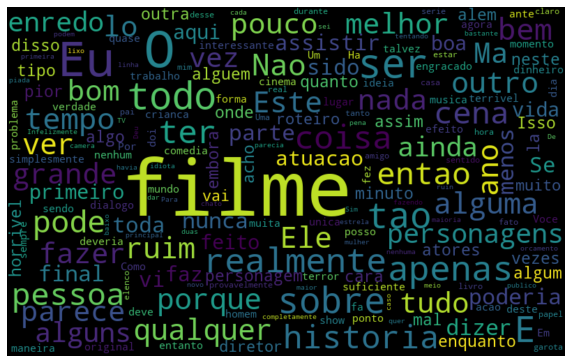

In [30]:
nuvem_palavras_neg(resenha, 'tratamento_3')

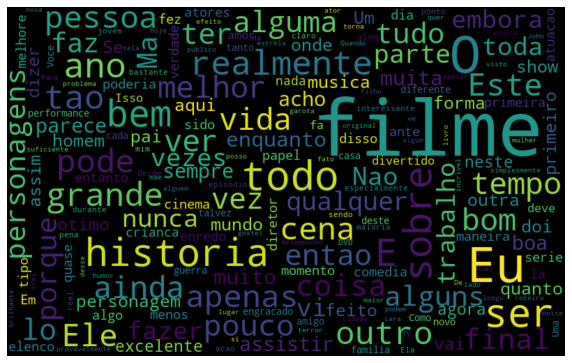

In [31]:
nuvem_palavras_pos(resenha, 'tratamento_3')

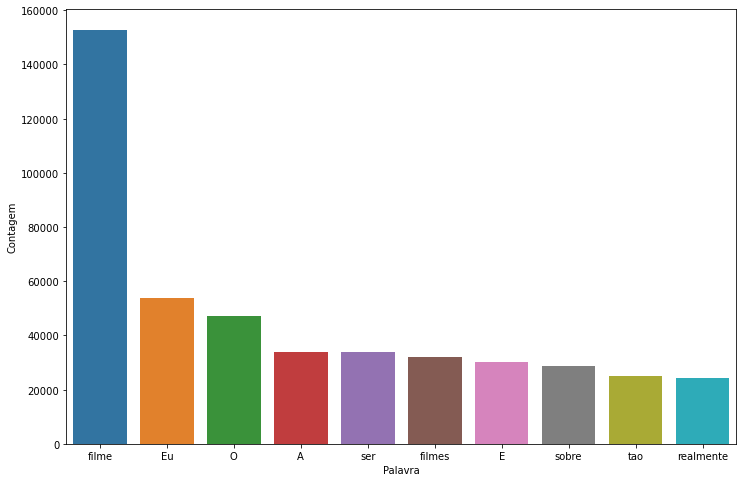

In [32]:
pareto(resenha, 'tratamento_3', 10)

In [35]:
frase_processada = list()

for opiniao in resenha['tratamento_3']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_4'] = frase_processada

In [36]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [37]:
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')

In [38]:
print(f'{(acuracia_tratamento4*100):.2f}%')

68.79%


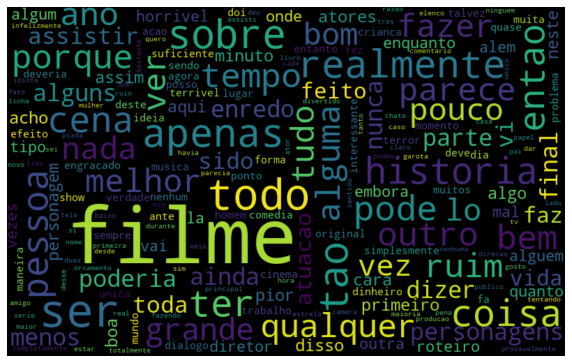

In [39]:
nuvem_palavras_neg(resenha, 'tratamento_4')

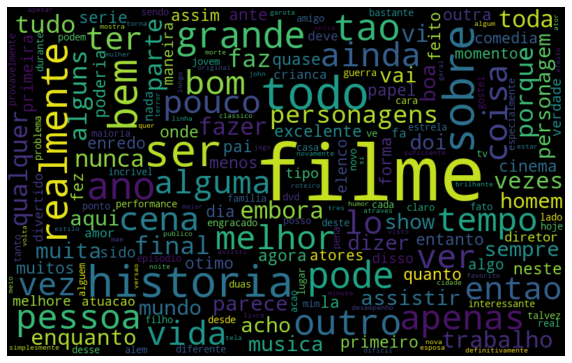

In [40]:
nuvem_palavras_pos(resenha, 'tratamento_4')

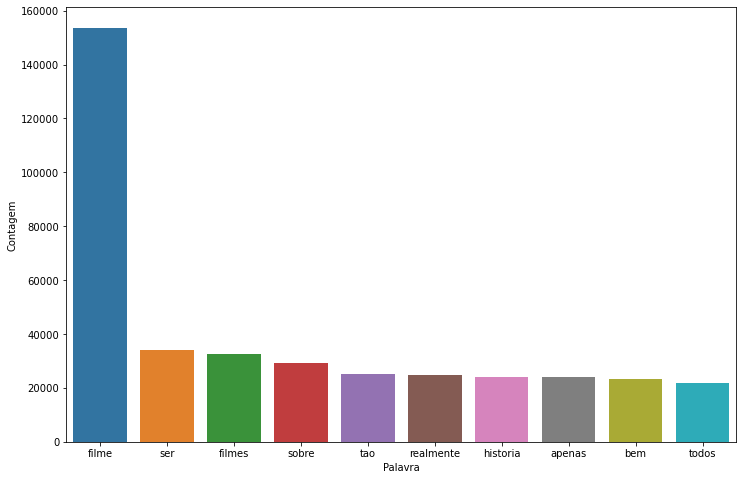

In [41]:
pareto(resenha, 'tratamento_4', 10)

In [43]:
stemmer = nltk.RSLPStemmer()


'corr'

In [44]:
frase_processada = list()

for opiniao in resenha['tratamento_4']:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    frase_processada.append(' '.join(nova_frase))
    
resenha['tratamento_5'] = frase_processada

In [45]:
acuracia_tratamento5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')

print(f'{(acuracia_tratamento5*100):.2f}%')
print(f'{(acuracia_tratamento4*100):.2f}%')

69.44%
68.79%


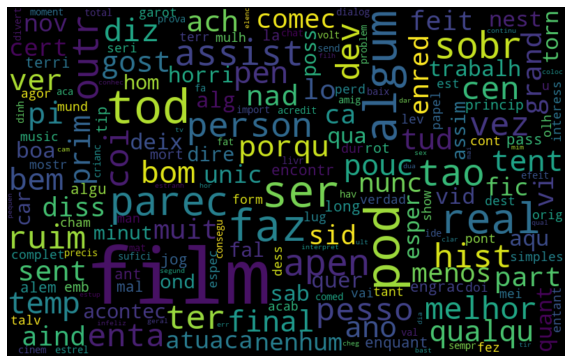

In [46]:
nuvem_palavras_neg(resenha, 'tratamento_5')

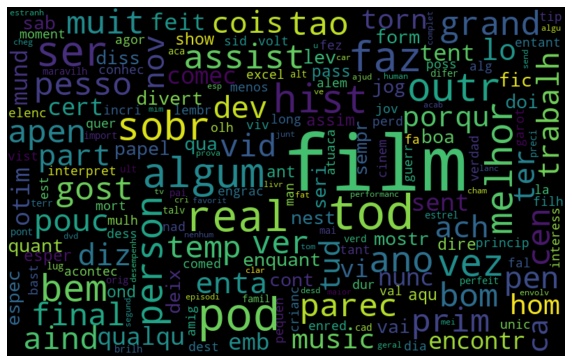

In [47]:
nuvem_palavras_pos(resenha, 'tratamento_5')

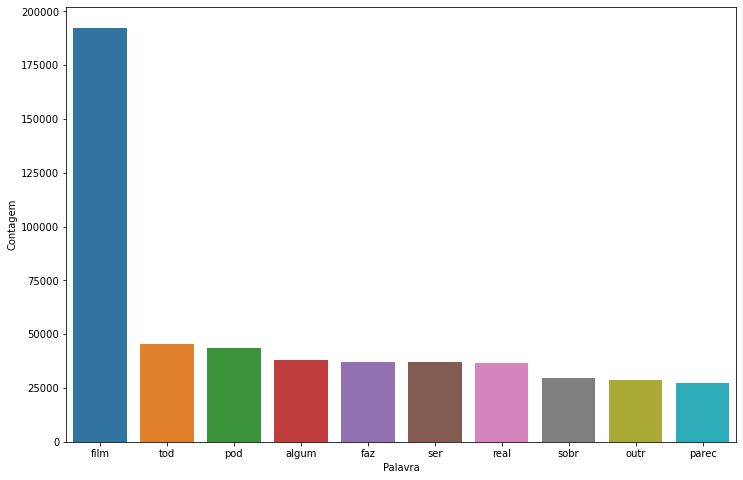

In [48]:
pareto(resenha, 'tratamento_5', 10)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_bruto,
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)

In [52]:
print(f'{(acuracia_tfidf_bruto*100):.2f}%')

66.01%


In [53]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(tfidf_tratados,
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)

In [54]:
print(f'{(acuracia_tfidf_tratados*100):.2f}%')

69.88%


In [55]:
from nltk import ngrams
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)

In [56]:
print(f'{(acuracia_tfidf_ngrams*100):.2f}%')

88.59%


In [57]:
from nltk import ngrams
tfidf = TfidfVectorizer(lowercase=False)
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              resenha['classificacao'],
                                                              random_state=42)

regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf = regressao_logistica.score(teste, classe_teste)

In [58]:
print(f'{(acuracia_tfidf*100):.2f}%')

88.42%


In [61]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf.get_feature_names()
)


In [62]:
pesos.nlargest(50, 0)

,0
otim,8.290483
excel,7.978023
perfeit,6.578863
favorit,5.778018
maravilh,5.286500
incri,5.049495
hilari,4.653807
divert,4.579577
ador,4.422221
brilh,4.268573


In [63]:
pesos.nsmallest(50, 0)

,0
pi,-9.175711
ruim,-9.169737
horri,-8.751676
terri,-7.186911
chat,-6.919290
nad,-6.029857
infeliz,-5.310517
decepca,-4.995826
ridicul,-4.950825
nenhum,-4.918834
